# Day 6: Loss Functions

## Introduction to Loss Functions
Loss functions are mathematical constructs that measure the discrepancy between the actual target values (\(y\)) and the predicted values (\(\hat{y}\)) generated by a machine learning model. The choice of a loss function significantly impacts the performance of a model by guiding the optimization process during training.

In this notebook, we will:
- Explore three key loss functions: **Mean Squared Error (MSE)**, **Cross-Entropy Loss**, and **Hinge Loss**.
- Derive the mathematical intuition and gradients for these functions.
- Implement and compare them using Python on synthetic datasets.
- Discuss the advantages, disadvantages, and suitable tasks for each loss function.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


## 1. Mean Squared Error (MSE) Loss

### Definition:
MSE measures the average squared difference between predicted values and actual target values, making it a standard choice for regression tasks.

### Formula:
MSE = (1/m) * Σ(y_actual - y_predicted)^2  
Where:
- \(m\): Total number of data points
- \(y_actual\): Actual target value
- \(y_predicted\): Predicted value

### Intuition:
- Errors are squared to penalize larger errors more heavily.
- The goal is to minimize these squared errors to improve the model's predictions.

### Gradient:
The gradient of MSE with respect to model parameters (\(theta\)) is:  
gradient = (-2/m) * X.T * (y_actual - y_predicted)  
Where:
- \(X\): Input matrix
- \(y_actual - y_predicted\): Residuals (difference between actual and predicted values)

### Advantages:
- Simple to compute and differentiate.
- Provides a smooth loss surface for optimization.

### Disadvantages:
- Sensitive to outliers since errors are squared.

### Applications:
- Regression tasks such as predicting prices or demand.


In [18]:
# MSE Implementation
def mse_loss(y_actual, y_predicted):
    return np.mean((y_actual - y_predicted)**2)

def mse_gradient(X, y_actual, y_predicted):
    m = len(y_actual)
    return -(2/m) * X.T.dot(y_actual - y_predicted)

# Example: Computing MSE Loss
np.random.seed(42)
X_reg = 2 * np.random.rand(100, 1)  # Input features
y_reg = 4 + 3 * X_reg + np.random.randn(100, 1)  # Targets with noise
X_b_reg = np.c_[np.ones((X_reg.shape[0], 1)), X_reg]  # Add bias term

theta_reg = np.random.randn(2, 1)  # Initialize parameters
y_reg_pred = X_b_reg.dot(theta_reg)  # Predictions

mse = mse_loss(y_reg, y_reg_pred)
print("MSE Loss:", mse)


MSE Loss: 31.009348571941214


## 2. Cross-Entropy Loss

### Definition:
Cross-Entropy Loss measures the difference between the actual labels and the predicted probabilities in classification tasks.

### Formula (Binary Classification):
CrossEntropy = -(1/m) * Σ[y_actual * log(y_predicted) + (1 - y_actual) * log(1 - y_predicted)]  
Where:
- \(y_actual\): Actual label (0 or 1)
- \(y_predicted\): Predicted probability for class 1

### Intuition:
- Encourages the model to output higher probabilities for the correct class.
- Penalizes predictions that deviate significantly from the actual labels.

### Gradient:
The gradient of Cross-Entropy Loss is:  
gradient = -(1/m) * X.T * (y_actual - y_predicted)

### Advantages:
- Effective for probabilistic models.
- Speeds up convergence in classification tasks.

### Disadvantages:
- Requires careful implementation to avoid numerical instability (e.g., log(0)).

### Applications:
- Logistic regression, neural networks for binary or multi-class classification.


In [19]:
# Cross-Entropy Implementation
def cross_entropy_loss(y_actual, y_predicted):
    epsilon = 1e-15  # Prevent log(0)
    y_predicted = np.clip(y_predicted, epsilon, 1 - epsilon)
    return -np.mean(y_actual * np.log(y_predicted) + (1 - y_actual) * np.log(1 - y_predicted))

def cross_entropy_gradient(X, y_actual, y_predicted):
    m = len(y_actual)
    return -(1/m) * X.T.dot(y_actual - y_predicted)

# Example: Computing Cross-Entropy Loss
np.random.seed(42)
X_cls = np.random.randn(100, 2)  # Features
y_cls = (X_cls[:, 0] + X_cls[:, 1] > 0).astype(int)  # Binary labels {0, 1}
y_cls_prob = 1 / (1 + np.exp(-X_cls.dot(np.random.randn(2, 1))))  # Sigmoid probabilities

ce_loss = cross_entropy_loss(y_cls, y_cls_prob)
print("Cross-Entropy Loss:", ce_loss)


Cross-Entropy Loss: 0.7417182541502514


## 3. Hinge Loss

### Definition:
Hinge Loss is used in classification tasks, particularly in Support Vector Machines (SVMs), to enforce a margin of separation between classes.

### Formula:
Hinge = (1/m) * Σ[max(0, 1 - y_actual * y_predicted)]  
Where:
- \(y_actual\): Actual label (-1 or 1)
- \(y_predicted\): Predicted value

### Intuition:
- Ensures that predictions not only classify correctly but also maintain a margin of confidence.
- Penalizes predictions close to the decision boundary.

### Gradient:
The gradient of Hinge Loss is:  
gradient = -(1/m) * X.T * (y_actual * indicator)  
Where:
- indicator = 1 if \(1 - y_actual * y_predicted > 0\), else 0.

### Advantages:
- Encourages separation between classes.
- Less sensitive to outliers compared to MSE.

### Disadvantages:
- Not differentiable everywhere.

### Applications:
- Binary classification, typically used with SVMs.


In [20]:
# Hinge Loss Implementation
def hinge_loss(y_actual, y_predicted):
    return np.mean(np.maximum(0, 1 - y_actual * y_predicted))

def hinge_gradient(X, y_actual, y_predicted):
    m = len(y_actual)
    indicator = (1 - y_actual * y_predicted) > 0
    return -(1/m) * X.T.dot(y_actual * indicator)

# Example: Computing Hinge Loss
y_cls = np.random.choice([-1, 1], size=100)  # Binary labels {-1, +1}
y_cls_pred = X_cls.dot(np.random.randn(2, 1))  # Predictions

hinge = hinge_loss(y_cls, y_cls_pred)
print("Hinge Loss:", hinge)


Hinge Loss: 1.0996009436950087


## 4. Comparing Loss Functions

### Summary:
Each loss function is suited for specific tasks:
- **MSE**: Best for regression.
- **Cross-Entropy**: Ideal for probabilistic classification.
- **Hinge**: Used for margin-based classification (e.g., SVM).

### Visualizing Loss Over Epochs
We will plot how each loss function evolves during training.


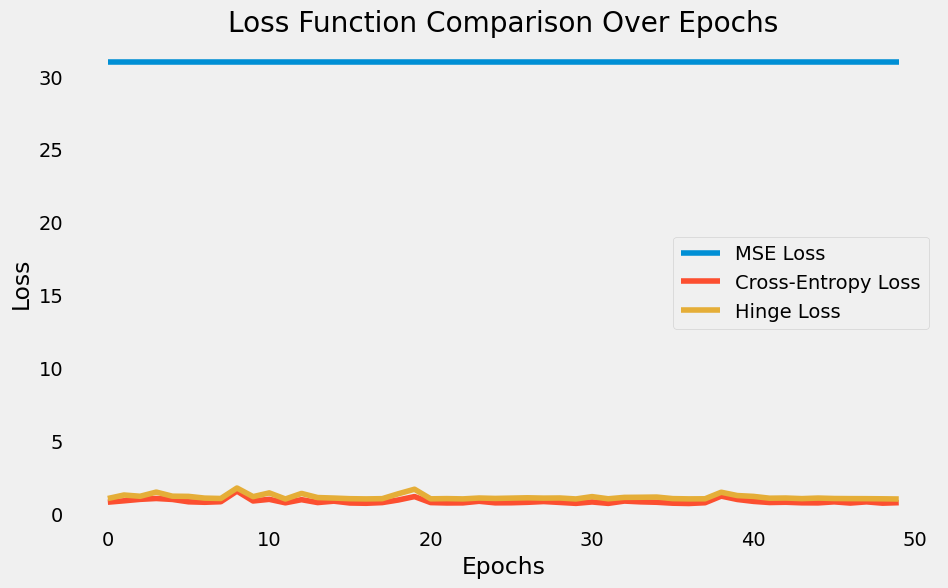

In [21]:
# Loss Comparison Visualization
epochs = 50
mse_history, ce_history, hinge_history = [], [], []

for epoch in range(epochs):
    y_reg_pred = X_b_reg.dot(theta_reg)
    y_cls_pred = X_cls.dot(np.random.randn(2, 1))
    y_cls_prob = 1 / (1 + np.exp(-y_cls_pred))

    mse_history.append(mse_loss(y_reg, y_reg_pred))
    ce_history.append(cross_entropy_loss(y_cls, y_cls_prob))
    hinge_history.append(hinge_loss(y_cls, y_cls_pred))

# Plotting Loss Curves
plt.figure(figsize=(10, 6))
plt.plot(mse_history, label="MSE Loss")
plt.plot(ce_history, label="Cross-Entropy Loss")
plt.plot(hinge_history, label="Hinge Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Function Comparison Over Epochs")
plt.legend()
plt.grid()
plt.show()


# Binary Classification on Real Dataset: Breast Cancer Wisconsin Dataset

In this notebook, we will:
1. Use the Breast Cancer Wisconsin dataset for binary classification.
2. Build a neural network to classify malignant and benign tumors.
3. Utilize cross-entropy loss and gradient descent for training.
4. Observe how the weights are updated to minimize the loss.


In [22]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)


**Explanation**:
- We're using the Breast Cancer Wisconsin dataset, which is a binary classification dataset.
- Random seed ensures reproducibility of results.


In [23]:
# Load the dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels (0 for benign, 1 for malignant)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Dataset Description**:
- The Breast Cancer dataset contains 569 samples with 30 features each.
- The target variable (`y`) has two classes:
  - 0: Benign tumor
  - 1: Malignant tumor

**Preprocessing**:
1. **Train-Test Split**: Divides data into training (80%) and testing (20%) sets.
2. **Feature Standardization**: Ensures that all features have zero mean and unit variance for efficient gradient descent optimization.


In [24]:
# Neural network parameters
input_size = X_train.shape[1]  # 30 features
hidden_size = 10               # Hidden layer with 10 neurons
output_size = 1                # Single output for binary classification

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Hyperparameters
learning_rate = 0.01
num_epochs = 500


**Neural Network Architecture**:
1. Input Layer: 30 neurons for 30 features.
2. Hidden Layer: 10 neurons with tanh activation.
3. Output Layer: 1 neuron with sigmoid activation for binary classification.

**Hyperparameters**:
- Learning rate controls the step size during weight updates.
- Number of epochs determines how many times the entire dataset is used for training.


In [25]:
# Activation and loss functions

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15  # To avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


**Explanation**:
- **Sigmoid**: Converts the output into probabilities.
- **Cross-Entropy Loss**: Measures the difference between the true labels and predicted probabilities.


In [26]:
# Convert labels to column vector
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Training the neural network
loss_history = []

for epoch in range(num_epochs):
    # Forward pass
    z1 = np.dot(X_train, W1) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(a1, W2) + b2
    y_pred = sigmoid(z2)

    # Compute loss
    loss = cross_entropy_loss(y_train, y_pred)
    loss_history.append(loss)

    # Backward pass
    dz2 = y_pred - y_train
    dW2 = np.dot(a1.T, dz2) / X_train.shape[0]
    db2 = np.sum(dz2, axis=0, keepdims=True) / X_train.shape[0]

    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * (1 - np.tanh(z1)**2)
    dW1 = np.dot(X_train.T, dz1) / X_train.shape[0]
    db1 = np.sum(dz1, axis=0, keepdims=True) / X_train.shape[0]

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    # Print loss every 50 epochs
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss:.4f}")


Epoch 50/500, Loss: 0.6325
Epoch 100/500, Loss: 0.4674
Epoch 150/500, Loss: 0.3773
Epoch 200/500, Loss: 0.3232
Epoch 250/500, Loss: 0.2876
Epoch 300/500, Loss: 0.2624
Epoch 350/500, Loss: 0.2435
Epoch 400/500, Loss: 0.2287
Epoch 450/500, Loss: 0.2165
Epoch 500/500, Loss: 0.2064


**Explanation**:
- **Forward Pass**: Calculates the output of the network using the current weights.
- **Loss Calculation**: Computes the cross-entropy loss between true and predicted labels.
- **Backward Pass**: Computes gradients of weights and biases to minimize loss.
- **Weight Updates**: Applies the gradient descent update rule.


### **Structure of the NN**

[ Input Layer ] --(W1, b1)--> [ Hidden Layer (tanh) ] --(W2, b2)--> [ Output Layer (sigmoid) ]
       ↑                        ↑                        ↑
   Input Data              Hidden Neurons             Output Prediction




1. **Forward Pass**:

```python
z1 = np.dot(X_train, W1) + b1
```
- `z1` represents the linear combination of inputs `X_train` and weights `W1`, plus the bias `b1`.
- In matrix form:  
  `z1 = X * W1 + b1`
  - `X_train` is the input data.
  - `W1` is the weight matrix connecting the input layer to the hidden layer.
  - `b1` is the bias for the hidden layer.

```python
a1 = np.tanh(z1)
```
- `a1` is the activation of the hidden layer after applying the hyperbolic tangent (`tanh`) function to `z1`.
- The `tanh` function introduces non-linearity to the model:  
  `a1 = tanh(z1)`

```python
z2 = np.dot(a1, W2) + b2
```
- `z2` is the linear combination of the hidden layer outputs `a1` and the weights `W2`, plus the bias `b2`.
- In matrix form:  
  `z2 = a1 * W2 + b2`
  - `a1` is the output from the hidden layer.
  - `W2` is the weight matrix connecting the hidden layer to the output layer.
  - `b2` is the bias for the output layer.

```python
y_pred = sigmoid(z2)
```
- `y_pred` is the final prediction after applying the sigmoid function to `z2`. The sigmoid function squashes the output between 0 and 1, making it suitable for binary classification.
- In equation form:  
  `y_pred = sigmoid(z2)`  
  Where the sigmoid function is:  
  `sigmoid(x) = 1 / (1 + exp(-x))`

---

2. **Compute Loss**:

```python
loss = cross_entropy_loss(y_train, y_pred)
```
- `loss` is calculated using the cross-entropy loss function, which is commonly used for classification tasks.
- The formula for binary cross-entropy is:  
  `loss = -1/N * ∑ [y * log(y_pred) + (1 - y) * log(1 - y_pred)]`
  Where:
  - `y_train` is the true label.
  - `y_pred` is the predicted probability.

```python
loss_history.append(loss)
```
- The computed loss is appended to the `loss_history` list for tracking the progress of the model's performance.

---

3. **Backward Pass (Backpropagation)**:

```python
dz2 = y_pred - y_train
```
- `dz2` is the gradient of the loss with respect to `z2`, which represents the change in the loss function with respect to the output layer’s linear combination.
- This is computed as:  
  `dz2 = y_pred - y_train`
  - `y_pred` is the predicted output.
  - `y_train` is the actual output (target label).

```python
dW2 = np.dot(a1.T, dz2) / X_train.shape[0]
```
- `dW2` is the gradient of the loss with respect to `W2`, the weight matrix for the output layer.
- This is computed by multiplying the transpose of `a1` with `dz2` (the gradient from the output layer) and dividing by the number of samples.
- Formula:  
  `dW2 = (a1.T * dz2) / N`
  - `a1.T` is the transpose of `a1` (hidden layer output).
  - `dz2` is the gradient from the output layer.
  - `N` is the number of training examples.

```python
db2 = np.sum(dz2, axis=0, keepdims=True) / X_train.shape[0]
```
- `db2` is the gradient of the loss with respect to `b2`, the bias of the output layer.
- This is computed by summing the gradients `dz2` across all training samples and dividing by the number of samples.
- Formula:  
  `db2 = sum(dz2) / N`

---

```python
da1 = np.dot(dz2, W2.T)
```
- `da1` is the gradient of the loss with respect to `a1`, the output from the hidden layer.
- This is computed by multiplying `dz2` (the gradient from the output layer) with the transpose of `W2` (weight matrix from the hidden layer to the output layer).
- Formula:  
  `da1 = dz2 * W2.T`

```python
dz1 = da1 * (1 - np.tanh(z1)**2)
```
- `dz1` is the gradient of the loss with respect to `z1`, the linear combination at the hidden layer.
- This is computed by applying the chain rule. Since the activation function is `tanh`, we use the derivative of `tanh(x)` which is:  
  `d/dx tanh(x) = 1 - tanh(x)^2`
- Formula:  
  `dz1 = da1 * (1 - tanh(z1)^2)`

```python
dW1 = np.dot(X_train.T, dz1) / X_train.shape[0]
```
- `dW1` is the gradient of the loss with respect to `W1`, the weight matrix for the input layer.
- This is computed by multiplying the transpose of `X_train` with `dz1` (the gradient from the hidden layer) and dividing by the number of samples.
- Formula:  
  `dW1 = (X_train.T * dz1) / N`

```python
db1 = np.sum(dz1, axis=0, keepdims=True) / X_train.shape[0]
```
- `db1` is the gradient of the loss with respect to `b1`, the bias of the hidden layer.
- This is computed by summing the gradients `dz1` across all training samples and dividing by the number of samples.
- Formula:  
  `db1 = sum(dz1) / N`

---

4. **Update Weights and Biases**:

```python
W1 -= learning_rate * dW1
b1 -= learning_rate * db1
W2 -= learning_rate * dW2
b2 -= learning_rate * db2
```
- These lines update the weights and biases using the computed gradients and the learning rate.
- The weights and biases are updated in the opposite direction of the gradient to minimize the loss (this is the essence of gradient descent).
- The update rule for each weight/bias is:  
  `W = W - learning_rate * dW`
  - `W` is the weight or bias to be updated.
  - `learning_rate` controls the step size.
  - `dW` is the gradient of the loss with respect to the weight/bias.


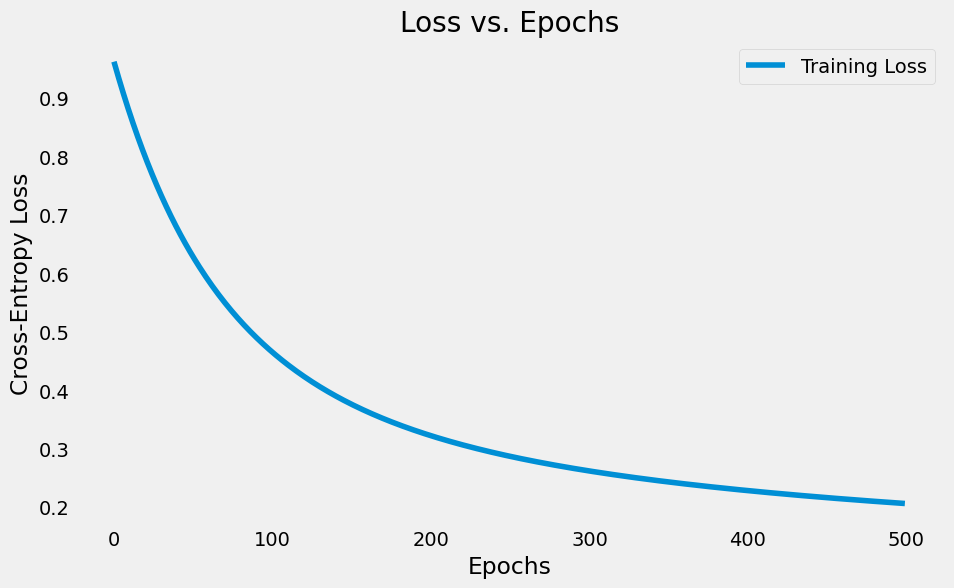

In [27]:
# Plot loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Cross-Entropy Loss")
plt.title("Loss vs. Epochs")
plt.legend()
plt.grid()
plt.show()


**Explanation**:
- The plot shows the decrease in loss over epochs, indicating that the model is learning.
- A steady decrease confirms that gradient descent effectively minimizes the cross-entropy loss.


In [28]:
# Evaluate the model on the test set
z1_test = np.dot(X_test, W1) + b1
a1_test = np.tanh(z1_test)
z2_test = np.dot(a1_test, W2) + b2
y_pred_test = sigmoid(z2_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_test >= 0.5).astype(int)

# Compute accuracy
accuracy = np.mean(y_pred_binary == y_test) * 100
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 90.35%


**Conclusion**:
- The test accuracy shows how well the model generalizes to unseen data.
- Cross-entropy loss combined with gradient descent successfully trained the neural network for binary classification.
